# Tiến hành làm sạch dữ liệu cổ phiếu Amazon sau khi thu thập

    Import thư viện

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path 
import warnings
warnings.filterwarnings('ignore')

    Đọc dữ liệu thô từ file raw_data.csv

In [2]:
data = pd.read_csv('raw_data/dataAMZN.csv').iloc[::-1]
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
2242,2024-11-29 00:00:00-05:00,205.830002,208.199997,204.589996,207.889999,24892400,0.0,0.0
2241,2024-11-27 00:00:00-05:00,206.979996,207.639999,205.050003,205.740005,28061600,0.0,0.0
2240,2024-11-26 00:00:00-05:00,201.899994,208.000000,201.789993,207.860001,41673700,0.0,0.0
2239,2024-11-25 00:00:00-05:00,199.279999,201.949997,199.000000,201.449997,40685700,0.0,0.0
2238,2024-11-22 00:00:00-05:00,198.250000,199.259995,196.750000,197.119995,31530800,0.0,0.0
...,...,...,...,...,...,...,...,...
4,2016-01-08 00:00:00-05:00,30.983000,31.207001,30.299999,30.352501,110258000,0.0,0.0
3,2016-01-07 00:00:00-05:00,31.090000,31.500000,30.260500,30.396999,141498000,0.0,0.0
2,2016-01-06 00:00:00-05:00,31.100000,31.989500,31.015499,31.632500,106584000,0.0,0.0
1,2016-01-05 00:00:00-05:00,32.342999,32.345501,31.382500,31.689501,116452000,0.0,0.0


    Kiểm tra thông tin dữ liệu

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 2242 to 0
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2243 non-null   object 
 1   Open          2243 non-null   float64
 2   High          2243 non-null   float64
 3   Low           2243 non-null   float64
 4   Close         2243 non-null   float64
 5   Volume        2243 non-null   int64  
 6   Dividends     2243 non-null   float64
 7   Stock Splits  2243 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 140.3+ KB


    Loại bỏ thành phần không mong muốn

In [4]:
data = data.drop(columns=['Dividends', 'Stock Splits'])
data

,Date,Open,High,Low,Close,Volume
2242,2024-11-29 00:00:00-05:00,205.830002,208.199997,204.589996,207.889999,24892400
2241,2024-11-27 00:00:00-05:00,206.979996,207.639999,205.050003,205.740005,28061600
2240,2024-11-26 00:00:00-05:00,201.899994,208.000000,201.789993,207.860001,41673700
2239,2024-11-25 00:00:00-05:00,199.279999,201.949997,199.000000,201.449997,40685700
2238,2024-11-22 00:00:00-05:00,198.250000,199.259995,196.750000,197.119995,31530800
...,...,...,...,...,...,...
4,2016-01-08 00:00:00-05:00,30.983000,31.207001,30.299999,30.352501,110258000
3,2016-01-07 00:00:00-05:00,31.090000,31.500000,30.260500,30.396999,141498000
2,2016-01-06 00:00:00-05:00,31.100000,31.989500,31.015499,31.632500,106584000
1,2016-01-05 00:00:00-05:00,32.342999,32.345501,31.382500,31.689501,116452000


    Lưu dữ liệu sau khi làm sạch vào file csv mới có tên là : clean_data.csv

In [5]:
filepath = Path('clean_data/clean_data.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
data.to_csv(filepath,index=False)  

Text(0.5, 1.0, 'Giá cổ phiếu Amazon cho toàn bộ thời gian ')

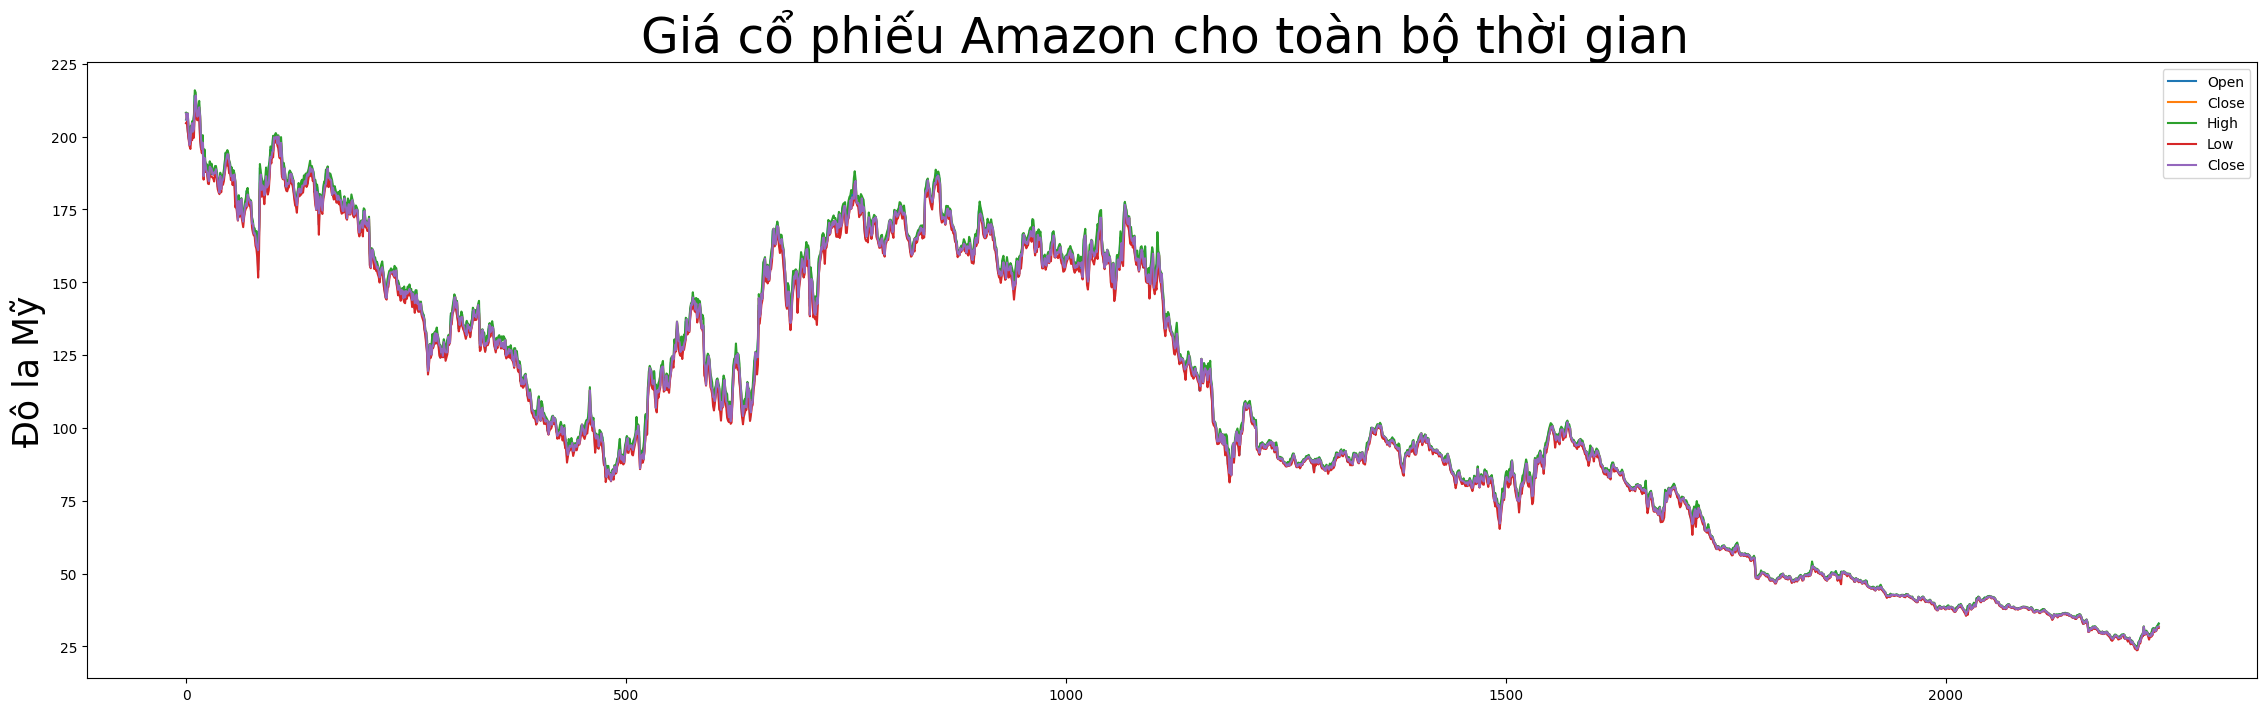

In [6]:
data_clean = pd.read_csv('clean_data/clean_data.csv')
data_clean[['Open', 'Close', 'High','Low','Close']].iloc[::-1].plot(figsize=(28,8))
plt.ylabel('Đô la Mỹ', fontsize = 25)
plt.title("Giá cổ phiếu Amazon cho toàn bộ thời gian ", fontsize=35)

    + Nếu chỉ sử dụng các biến có trong dataset thì rất khó để dự đoán vì sự biến thiên không nhiều. Bước tiếp theo chúng ta sẽ tạo thêm các đặc trưng mới.

    + Không thể xử lý ngoại lệ hoặc giảm chiều cho bộ dataset này vì sẽ làm mất tính biến thiên của thời gian